# Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = pd.read_csv('./Data/2022 표준지 공시지가.csv')
data.head(3)

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일련번호    540050 non-null  int64  
 1   시군구     540050 non-null  int64  
 2   읍면동리    540050 non-null  int64  
 3   지번구분    540050 non-null  int64  
 4   본번지     540050 non-null  object 
 5   부번지     540050 non-null  object 
 6   시도명     540050 non-null  object 
 7   시군구명    537528 non-null  object 
 8   소재지     540050 non-null  object 
 9   지목      540050 non-null  object 
 10  면적      540050 non-null  float64
 11  용도지역1   540050 non-null  object 
 12  용도지역2   5398 non-null    object 
 13  이용상황    540050 non-null  object 
 14  주위환경    540050 non-null  object 
 15  지세명     540050 non-null  object 
 16  형상명     540050 non-null  object 
 17  도로교통    540050 non-null  object 
 18  공시지가    540050 non-null  int64  
 19  지리적위치1  540050 non-null  object 
 20  지리적위치2  515324 non-null  object 
 21  방위      20

# EDA

## 시도별 공시지가

In [4]:
data['시도명'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

<Axes: xlabel='시도명', ylabel='공시지가'>

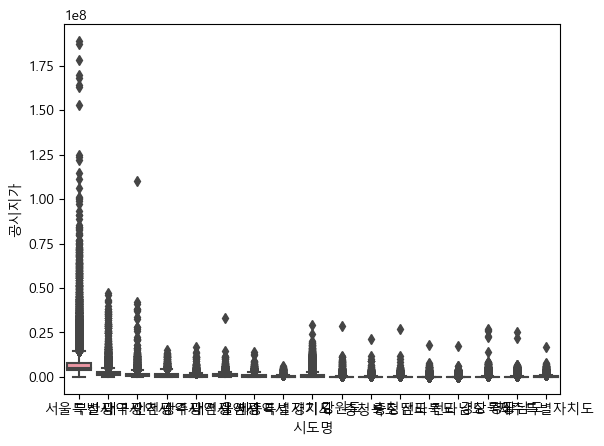

In [5]:
sns.boxplot(x= '시도명', y= '공시지가', data= data)

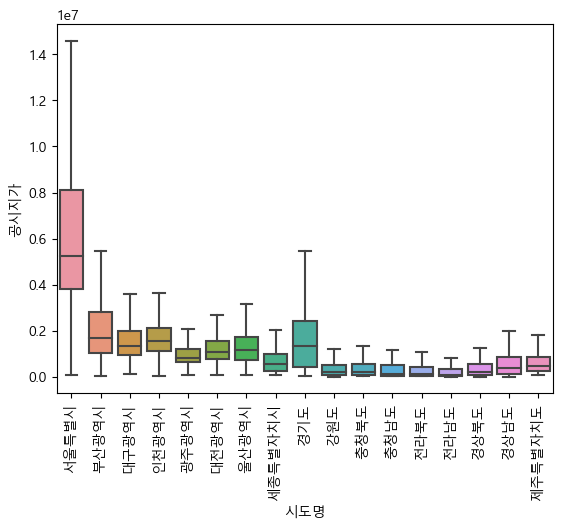

In [6]:
sns.set_palette('Set2')

sns.boxplot(x= '시도명', y= '공시지가', data= data[data['지목'] == '대'],
            showfliers= False)
plt.xticks(rotation= 90)

plt.show()

## Derived Variable

In [7]:
data['가격'] = data['공시지가'] * data['면적']
data.head(2)

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,가격
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN,504110250.0
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향,528370650.0


## 시도별 가격 비율

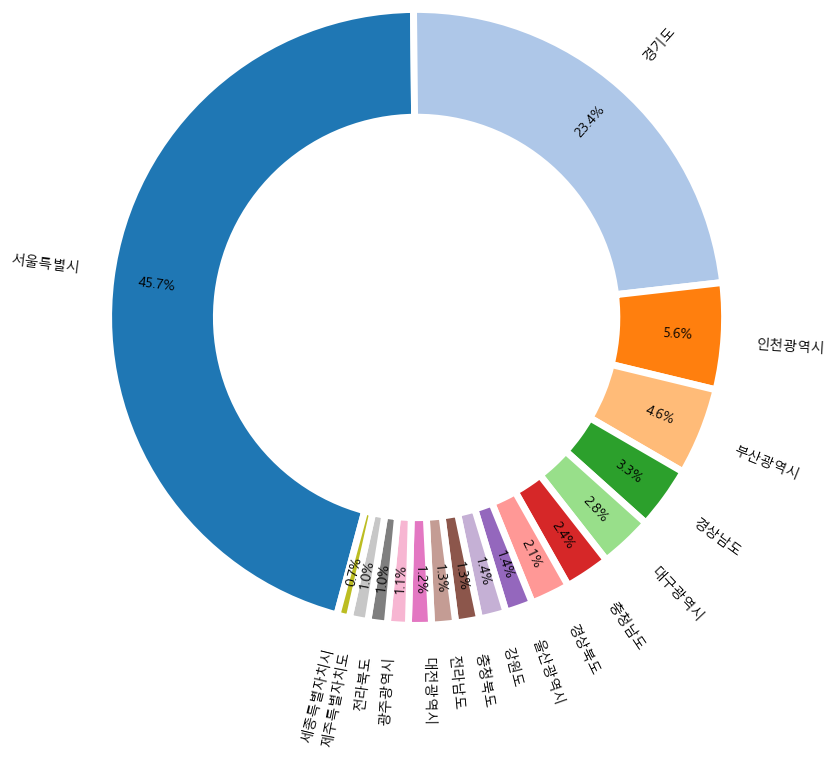

In [8]:
price_by_city = data.groupby('시도명')['가격'].sum().sort_values(ascending= False)
ratio = price_by_city.values
labels = price_by_city.index
colors = plt.get_cmap('tab20').colors
w = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.figure(figsize= (5,5))

patches, labels, pct_texts = plt.pie(ratio, labels= labels, counterclock= False, colors= colors, wedgeprops= w, autopct= '%.1f%%', startangle= 255, rotatelabels=True, radius = 2, pctdistance= 0.85)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
    
plt.show()

## 도로 교통별 공시지가

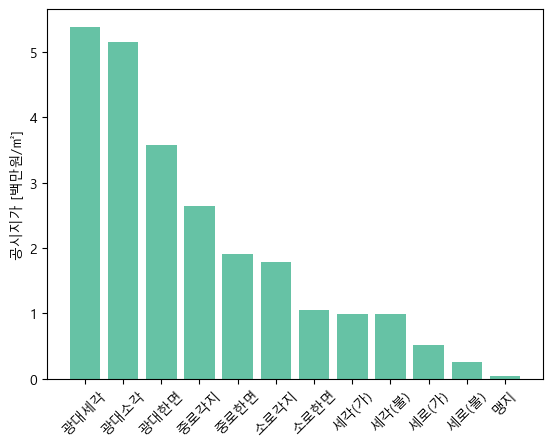

In [9]:
price_by_traffic = data.groupby('도로교통')['공시지가'].mean().sort_values(ascending= False)

plt.figure()

ax = plt.bar(price_by_traffic.index, price_by_traffic.values / 1e6)
plt.xticks(rotation= 45)
plt.ylabel('공시지가 [백만원/㎡]')

plt.show()

### 단위 변경

In [10]:
from matplotlib.ticker import FuncFormatter

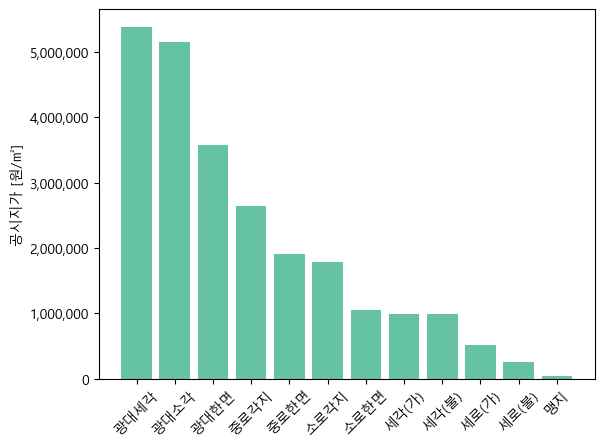

In [11]:
price_by_traffic = data.groupby('도로교통')['공시지가'].mean().sort_values(ascending= False)

fig, ax = plt.subplots(1)

ax.bar(price_by_traffic.index, price_by_traffic.values)
ax.tick_params('x', labelrotation= 45)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p : format(int(x), ',')))
ax.set_ylabel('공시지가 [원/㎡]')

plt.show()

## 공시지가 Scatter

In [12]:
from geopy.geocoders import Nominatim

In [13]:
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [14]:
geocoding('창원시 마산합포구')

[35.1969737, 128.5673576]

In [15]:
from tqdm import tqdm

In [16]:
jh = data[data['시군구명'] == '창원진해구']
address = '진해구' + ' ' + jh['소재지']

latitude = []
longitude =[]

for i in tqdm(address):
    lat, lon = geocoding(i)
    
    latitude.append(lat)
    longitude.append(lon)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1330/1330 [11:07<00:00,  1.99it/s]


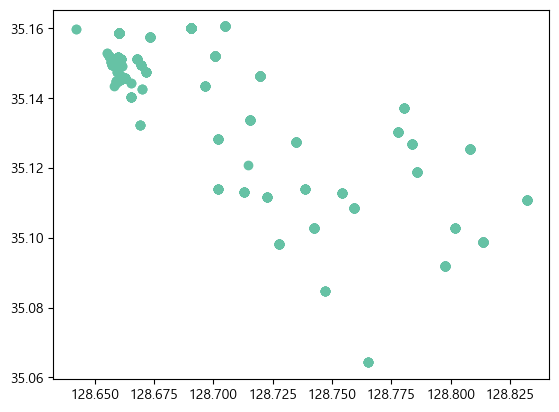

In [17]:
longitude_array = np.array(longitude)
latitude_array = np.array(latitude)

mask = longitude_array != 0

plt.scatter(longitude_array[mask], latitude_array[mask])

In [18]:
%matplotlib qt5

In [19]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(111, projection= '3d')

l = len(longitude_array[mask])
ax1.bar3d(longitude_array[mask],
          latitude_array[mask],
          np.zeros(l),
          np.full(l, 0.005), np.full(l, 0.005),
          jh['공시지가'][mask],
          color= 'turquoise')

plt.show()

In [20]:
%matplotlib inline